#                           PROYECTO 1
#         Horas anuales trabajadas en Colombia

# Grupo 1: 
Cindy Zulima Alzate Román,
Diana Rocío Díaz Rodríguez,
Catalina Lago Martínez,
Nidia Marcela Ortíz Sandoval

# 1. Análisis del contexto del problema y relevancia del análisis: 

En Colombia suelen aparecer con frecuencia proyectos de ley que tramitan en el Congreso y que se enfocan en reducir el horario laboral y o aumentarlas por vía de reducir festivos, vacaciones u otros descansos. El asunto es un tema de intenso debate dentro de la sociedad colombiana. Por un lado, se propone disminuir las horas semanales, aunque sea de manera gradual, apoyándose de la flexibilidad del horario y en otros aspectos. Por otro lado, el sector empresarial considera que menos horas de trabajo se traducen en aumento de los costos a las empresas, que tienen efectos negativos en los salarios, aumento en la tasa de desempleo y por ende un impacto negativo en la economía del país, por lo tanto, las empresas han buscado proyectos que aumenten las horas, ya que esto en su perspectiva mejora la productividad del país. Estas discusiones se han dado en varios momentos en el país, pero han aparecido con frecuencia desde 2004, cuando entraron a regir varias de las normas de la Ley 100.

Frente a nuestros paises pares, en Latinoamérica, Colombia trabaja muchas más horas que Cuba y Argentina, quienes tienen los menores indicadores de horas laborales. Siguen en el ranking Brasil (1.910,4), Ecuador (1.929,6) y Chile (1963,2). Muchas organizaciones internacionales como la OCDE usan estas cifras para determinar el nivel de calidad de vida en un país, y en nuestro país particularmente firmas como Euromonitor International, Michael Page y Manpower se apoyan en estos datos para hacer cálculos de rangos salariales.

Sin embargo, al ver el panorama global, resulta aún más desfavorable la comparación para Colombia. Por ejemplo, un alemán trabaja 103 días menos, compuestos cada uno por 8 horas laborales, que un colombiano. Vale aclarar que, en el ranking de la OCDE, Alemania ocupa el primer lugar en menos horas de trabajo, además del primer lugar en productividad. Existiendo entre los dos una diferencia aproximada de 830 horas al 2016. Pero Colombia no solamente tiene una amplia diferencia respecto a Alemania, sino que está muy lejos de top en el ranking de la OCDE: Dinamarca 1.410 horas, Noruega 1.424 horas, Países Bajos 1.430 horas, Francia 1.472 horas, incluso lejos del promedio: 1.783 a 2016, muy cercano al nivel de Estados Unidos que tiene un indicador de 1.783.

Colombia al ingresar a la OCDE, configuró grandes metas de desarrollo económico y social, y por supuesto monitorear la evolución del número de horas que trabajan los empleados es importante para conocer si mejora o desmejora progresivamente las decisiones en pro de mejorar. 

Calcular las horas trabajadas puede parecer sencillo, se deben sumar las horas trabajadas en un año por cada uno en los trabajadores y dividirlas en las personas empleadas, sin embargo, en el caso de Colombia la informalidad puede ser un factor de subestimación. Algunas de las fuentes actuales tratan de incluir las personas identificadas en formalidad con un promedio de horas calculado para casos específicos. 

El objetivo de este análisis es calcular la evolución de las horas dedicadas en un año por un empleado colombiano, para identificar su tendencia y tratar de predecir cómo se comportará en los años venideros.


# 2. Descripción de los datos: 

A continuación se presenta el análisis de los componentes de la serie de tiempo, principalmente frente a estacionalidad, ciclicidad, autocorrelación, comportamiento de los residuos, entre otros. Además, de la presentación de los gráficos que permiten comprender claramente cada uno de los componentes.

La serie de datos corresponde a las horas anuales trabajadas en Colombia durante los años comprendidos entre 1950 y 2017. El promedio anual de horas trabajadas se define como el número total de horas trabajadas por año dividido por el número promedio de personas empleadas por año. Las horas reales trabajadas incluyen las horas de trabajo regular de los trabajadores de tiempo completo, y de medio tiempo, las horas extras remuneradas y no remuneradas, y excluyen el tiempo no trabajado debido a días festivos, vacaciones anuales pagadas, enfermedad propia, lesiones y discapacidad temporal, licencia de maternidad, licencia parental, escolaridad o capacitación, huelga o disputa laboral, mal tiempo, licencia de compensación y otras razones. Los datos cubren empleados y trabajadores independientes. Este indicador se mide en términos de horas por trabajador por año.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
#Se leen los datos 
data = pd.read_csv('annual_hours_worked2.csv',sep=";", decimal=",",index_col=0)
data.tail()

,Working_hours
year,
31/12/2013,2000.594
31/12/2014,1991.746
31/12/2015,1997.480
31/12/2016,1997.480
31/12/2017,1997.480


In [3]:
data['Working_hours'] = data['Working_hours'].astype(float)
data['year'] = pd.to_datetime(data.index)
data.set_index('year', inplace=True)
data.index = pd.to_datetime(data.index)

In [4]:
# Se tiene información desde 1950 hasta el 2017
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 1950-12-31 to 2017-12-31
Data columns (total 1 columns):
Working_hours    68 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


De acuerdo con la siguiente gráfica, existe una tendencia decreciente clara en el comportamiento de las hogares trabajadas entre 1950 y 1995. Mientras que a partir de la este último año hasta 2017, se aprecia un ligero crecimiento y una aparente dependencia de la media respecto a los años. 

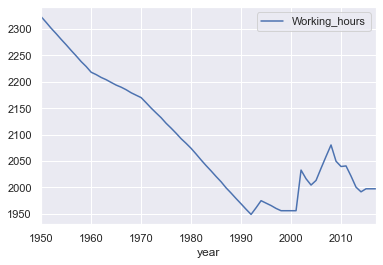

In [5]:
data.plot()

## Verificando estacionariedad

Prueba de hipótesis de Dickey Fuller

Ho: La serie es no estacionaria

Ha: La series es estacionaria

Dado que el p-valor de la prueba es 0.12 no se rechaza la hipótesis nula y se concluye que la serie es no estacionaria.

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data.Working_hours)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.466003
p-value: 0.123967
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590


## Componentes de la serie
Como se evidencia en los siguiente gráficos de descomposición, no existe una parte estacional en la serie y los residuos no muestran el cumplimiento de los supuestos para las series de tiempo.

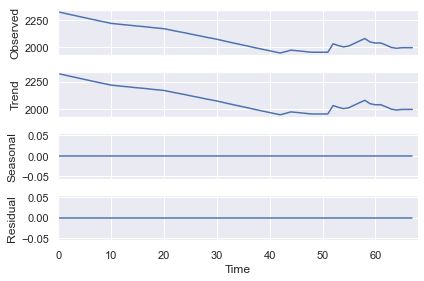

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
#series = ...
result = seasonal_decompose(np.asarray(data), model='additive',freq=1)
result.plot()
pyplot.show()

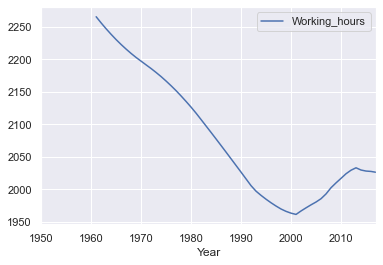

In [8]:
# Se gráfica la tendencia 
tendencia = data[['Working_hours']]
tendencia.rolling(12).mean().plot()
plt.xlabel('Year');

### Diferenciar la serie
De acuerdo con el siguiente gráfico, al diferenciar la serie se corrige la tendencia decreciente original. 

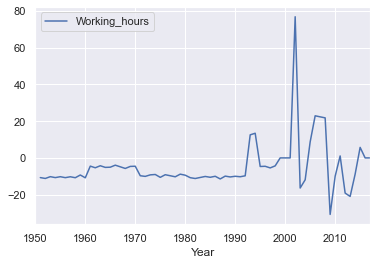

In [9]:
# Se gráfica la estacionalidad
data[['Working_hours']].diff().plot()
plt.xlabel('Year');

Con la serie diferenciada se obtiene un p-valor menor a 0.05, entonces la serie es estacionaria.

In [10]:
#Probar estacionariedad:  
from statsmodels.tsa.stattools import adfuller
prueba=data['Working_hours'].diff().iloc[1:]
result = adfuller(prueba)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.738823
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


# Gráficas de autocorrelación simple y autocorrelación parcial

Como se aprecia en la gráfica de autocorrelación simple, las autocorrelaciones decrecen lentamente, razón por la que se puede considerar que el proceso es un autorregresivo. De acuerdo con el gráfico de autocorrelaciones parciales se tiene un modelo autorregresivo de orden 1. 

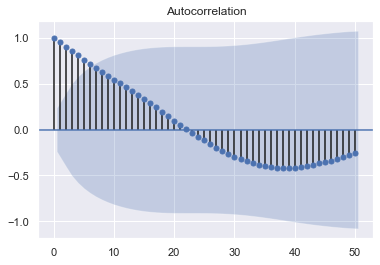

In [11]:
# Se corren los gráficos de autocorrelación y autocorrelaciones parciales para identificar el tipo de datos. 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Working_hours'], lags=50);

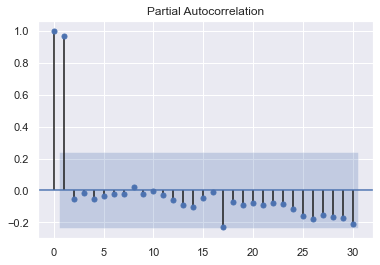

In [12]:
plot_pacf(data['Working_hours'], lags=30);

# 3. Aplicación de los modelos 

## Evaluación del modelo ARIMA

In [13]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          Working_hours   No. Observations:                   68
Model:                     ARMA(1, 0)   Log Likelihood                -280.122
Method:                       css-mle   S.D. of innovations             14.375
Date:                Sat, 20 Jun 2020   AIC                            566.245
Time:                        20:36:35   BIC                            572.903
Sample:                    12-31-1950   HQIC                           568.883
                         - 12-31-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2151.2894    145.515     14.784      0.000    1866.086    2436.493
ar.L1.Working_hours     0.9957      0.006    176.641      0.000       0.985       1.007
                

C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [14]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(data, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\kata_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.Working_hours   No. Observations:                   67
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -268.675
Method:                       css-mle   S.D. of innovations             13.342
Date:                Sat, 20 Jun 2020   AIC                            543.350
Time:                        20:36:35   BIC                            549.964
Sample:                    12-31-1951   HQIC                           545.967
                         - 12-31-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.8615      1.954     -2.488      0.015      -8.691      -1.032
ar.L1.D.Working_hours     0.1683      0.120      1.405      0.165      -0.066       0.403
        

## Análisis de residuales
De acuerdo con los resultados se observa que los errores no tienen media cero y su varianza no es constante. De acuerdo con la prueba de Kolmogorov Smirnov se verifica que la distribución de los errores no es normal. 

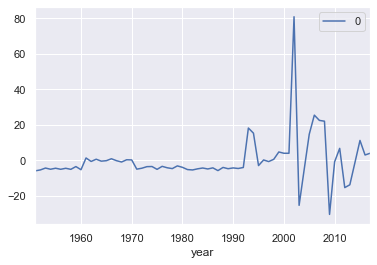

In [15]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

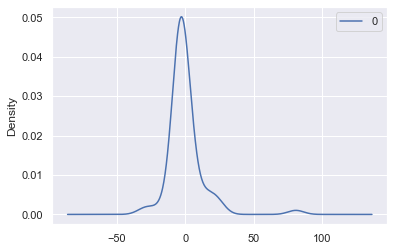

               0
count  67.000000
mean    0.014702
std    13.443308
min   -30.399469
25%    -4.761459
50%    -3.448002
75%     0.656952
max    80.929530


In [16]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [17]:
from scipy.stats import kstest
kstest(residuals,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

## Rolling ARIMA
Se realizan los cálculos de RMSE para ARIMA(1,0,0) y ARIMA(1,1,0) se obtiene que el de menor RMSE corresponde al ARIMA(1,0,0)

In [18]:
# 110
from sklearn.metrics import mean_squared_error

X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()



for t in range(len(test)):

    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
        
mean_squared_error(test, predictions)**0.5

26.337370954843053

In [19]:
# 100
from sklearn.metrics import mean_squared_error

X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()



for t in range(len(test)):

    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
        
mean_squared_error(test, predictions)**0.5

20.58464680262596

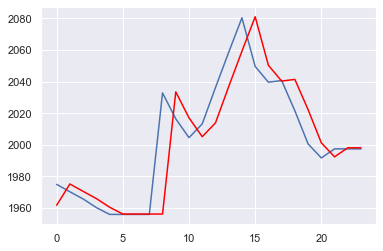

In [30]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Evaluación del modelo con PROPHET

In [3]:
data = pd.read_csv('annual_hours_worked2.csv',sep=";", decimal=",")

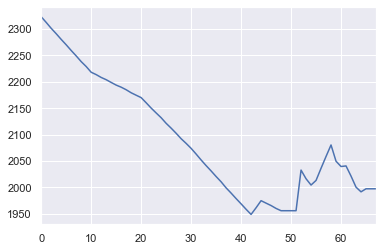

In [4]:
data.columns = ['ds', 'y']
data['y'] = data['y'].astype(float)
data['ds'] = pd.to_datetime(data['ds'])
data['y'].plot()

In [72]:
#data=data[:20]

In [5]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods = 10, freq='Y')

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
73,2023-12-31,2015.278292,1992.804679,2038.555313
74,2024-12-31,2011.149899,1986.906452,2036.537277
75,2025-12-31,2010.911698,1983.305300,2037.741909
76,2026-12-31,2011.737141,1980.565562,2042.726918
77,2027-12-31,2013.555710,1977.081224,2048.390303


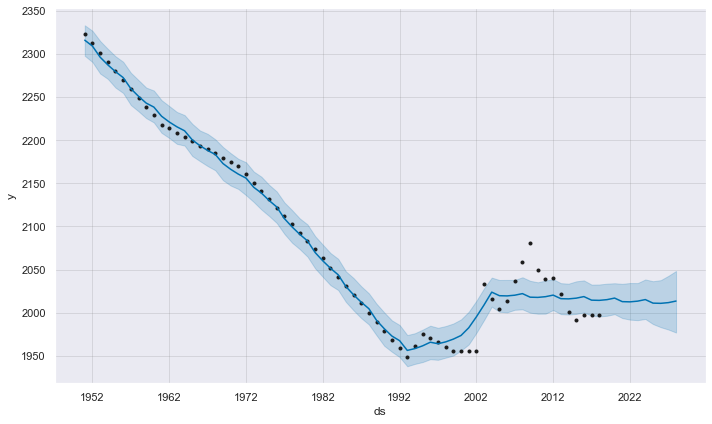

In [8]:
fig1 = m.plot(forecast)

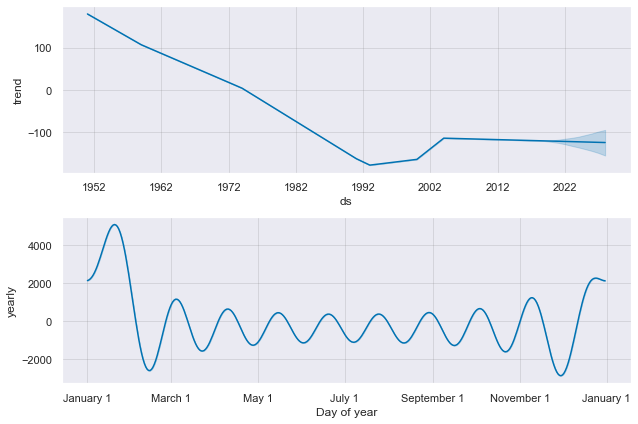

In [9]:
m.plot_components(forecast);

In [13]:
X = data['y'].values
size = int(len(X) * 0.66)
train, test = data.iloc[0:size], data.iloc[size:len(X)]

history = train
predictions = list()
rmse = list()

for t in range(len(test)):
    m = Prophet()
    m.fit(history)
    future = m.make_future_dataframe(periods= 1, freq='Y')
    forecast = m.predict(future)
    forecast['y']=forecast['yhat']
    history=history.append(forecast[['ds','y']].tail(1))
    yhat = forecast['yhat'].values[-1]
    predictions.append(yhat)
    obs = test['y'].iloc[t]
    print('predicted=%f, expected=%f' % (yhat, obs))


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1936.706910, expected=1975.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1927.294665, expected=1970.328000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1918.483018, expected=1965.771000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1911.263298, expected=1960.328000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1902.963147, expected=1956.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1893.840794, expected=1956.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1885.875090, expected=1956.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1878.729916, expected=1956.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1870.217575, expected=2032.886000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1860.574378, expected=2016.488000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1851.649617, expected=2004.563000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1842.951340, expected=2013.287000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1834.004827, expected=2036.232000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1824.849464, expected=2058.601000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1817.082221, expected=2080.419000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1809.356061, expected=2049.647000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1800.834123, expected=2039.653000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1791.888527, expected=2040.730000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1782.794650, expected=2021.570000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1774.959230, expected=2000.594000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1766.437651, expected=1991.746000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1757.239404, expected=1997.480000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=1748.221356, expected=1997.480000
predicted=1740.931395, expected=1997.480000


In [14]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test.y.values, predictions)**0.5
print('Test MSE: %.3f' % error)

Test MSE: 184.235


In [15]:
X = data['y'].values
size = int(len(X) * 0.9)
train, test = data.iloc[0:size], data.iloc[size:len(X)]

history = train
predictions = list()
rmse = list()

for t in range(len(test)):
    m = Prophet()
    m.fit(history)
    future = m.make_future_dataframe(periods= 1, freq='Y')
    forecast = m.predict(future)
    forecast['y']=forecast['yhat']
    history=history.append(forecast[['ds','y']].tail(1))
    yhat = forecast['yhat'].values[-1]
    predictions.append(yhat)
    obs = test['y'].iloc[t]
    print('predicted=%f, expected=%f' % (yhat, obs))


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2075.468524, expected=2040.730000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2083.591924, expected=2021.570000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2094.437915, expected=2000.594000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2104.144382, expected=1991.746000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2116.787016, expected=1997.480000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=2122.573678, expected=1997.480000
predicted=2131.110082, expected=1997.480000


In [16]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test.y.values, predictions)**0.5
print('Test MSE: %.3f' % error)

Test MSE: 102.979


# 4. Conclusiones

- Aunque la serie mostraba una clara tendencia a la baja hasta el año 95, desde esa fecha empieza a presentar subidas y bajadas, mostrando que desde ese año no se evidencia una clara tendencia. 
- La serie original resulta ser no estacionaria por lo que requirió una diferenciación de la misma para conseguir la estacionariedad.
- Al ejecutar los modelos ARIMA (1,1,0) y (1,0,0), para este último se obtuvo al menor RMSE, sin embargo, el modelo solo se puede aplicar a la serie diferenciada que cumple la condición de estacionariedad.
- Cuando se hizo uso de la librería PROPHET, se realizaron 2 particiones de la base para el entrenamiento y la prueba del modelo, con la primera partición (33% para test) se obtuvo un RMSE=184.235, mientras que la segunda partición (10% para test) generó un RMSE=102.979, haciendo que esta última distribución generara mayor precisión en la estimación de los pronósticos, sin embargo, se evidenció que se hace más difícil alcanzar la precisión cuando se reduce la base para el entrenamiento del modelo.  